<a href="https://colab.research.google.com/github/dzkha/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [10]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'

columns = ['age_at_op','op_year','ax_nodes','survival']
df =pd.read_csv(url, header=None, names=columns)

df.count() #Has correct number of instances

age_at_op    306
op_year      306
ax_nodes     306
survival     306
dtype: int64

In [8]:
df.isna().sum() #No NaNs
df.isnull().sum().sort_values(ascending=False)

age_at_op    int64
op_year      int64
ax_nodes     int64
survival     int64
dtype: object

In [11]:
def convert_survival(x):
  if x == 2:
    return 0
  else:
    return 1
   
df['survival'] = df['survival'].apply(convert_survival)
df['survival']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     0
25     1
26     1
27     1
28     1
29     1
      ..
276    1
277    1
278    1
279    1
280    1
281    0
282    1
283    1
284    1
285    0
286    0
287    1
288    1
289    1
290    1
291    1
292    1
293    0
294    1
295    1
296    1
297    1
298    1
299    0
300    1
301    1
302    1
303    1
304    0
305    0
Name: survival, Length: 306, dtype: int64

In [57]:
df.head()

,age_at_op,op_year,ax_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

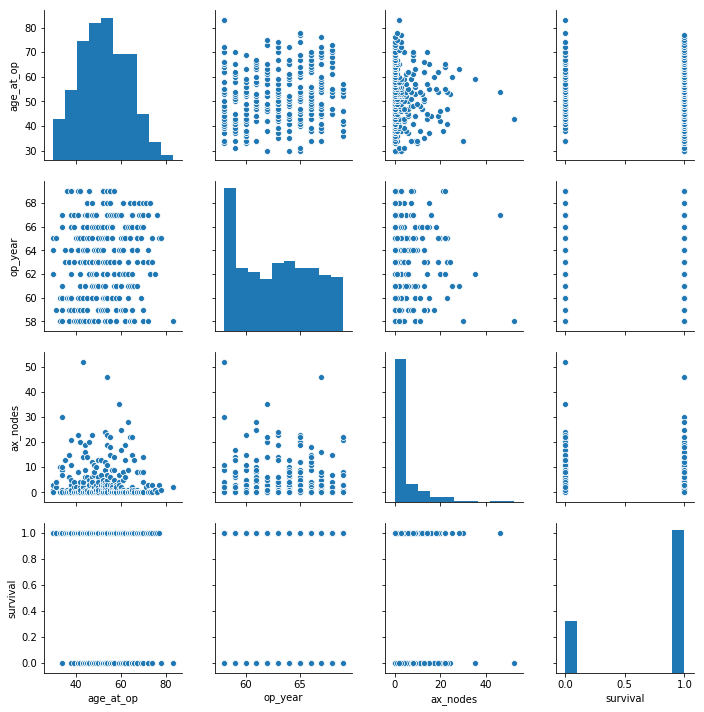

In [12]:
import seaborn as sns

sns.pairplot(df)

In [16]:
pd.crosstab(df['op_year'], df['survival'], normalize='columns')

survival,0,1
op_year,,
58,0.148148,0.106667
59,0.111111,0.080000
60,0.049383,0.106667
61,0.037037,0.102222
62,0.086420,0.071111
63,0.098765,0.097778
64,0.098765,0.102222
65,0.160494,0.066667
66,0.074074,0.097778


In [15]:
df.describe()

,age_at_op,op_year,ax_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


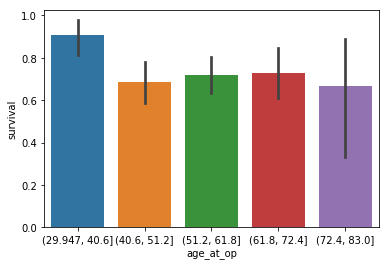

In [22]:
age_bins = pd.cut(df['age_at_op'], 5)
sns.barplot(x=age_bins, y=df['survival'])

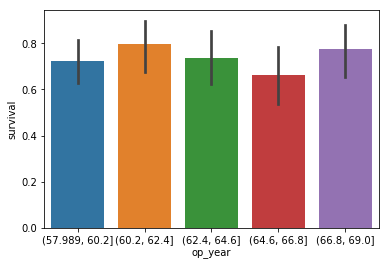

In [24]:
op_year_bins = pd.cut(df['op_year'], 5)
sns.barplot(x=op_year_bins, y=df['survival'])

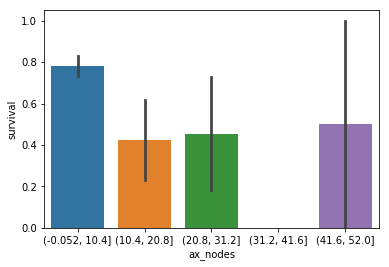

In [25]:
node_bins = pd.cut(df['ax_nodes'], 5)
sns.barplot(x=node_bins, y=df['survival'])

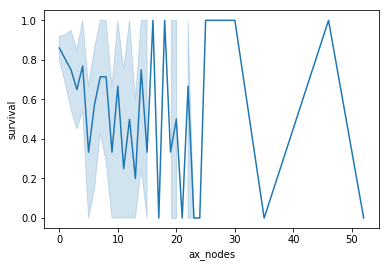

In [38]:
sns.lineplot(x=df['ax_nodes'], y=df['survival'])

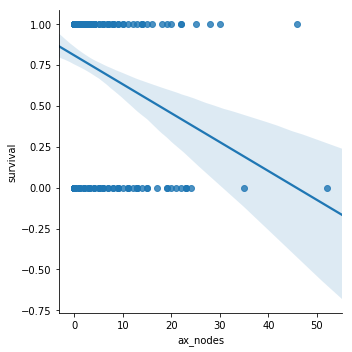

In [43]:
sns.lmplot(x='ax_nodes', y='survival', data = df)

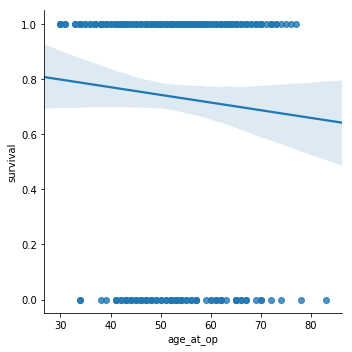

In [44]:
sns.lmplot(x='age_at_op', y='survival', data = df)

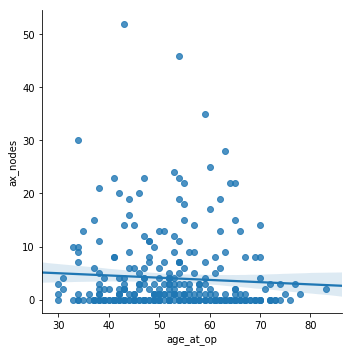

In [45]:
sns.lmplot(x='age_at_op', y='ax_nodes', data = df)

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [19]:
from scipy.stats import pearsonr
df.corr(method='pearson')

,age_at_op,op_year,ax_nodes,survival
age_at_op,1.000000,0.089529,-0.063176,-0.067950
op_year,0.089529,1.000000,-0.003764,0.004768
ax_nodes,-0.063176,-0.003764,1.000000,-0.286768
survival,-0.067950,0.004768,-0.286768,1.000000


In [56]:
df2 = df[df['age_at_op'] <40] #Experimenting with restricting variables
df2.corr(method='pearson') 

,age_at_op,op_year,ax_nodes,survival
age_at_op,1.000000,0.061309,-0.083941,-0.048278
op_year,0.061309,1.000000,0.051154,-0.279616
ax_nodes,-0.083941,0.051154,1.000000,-0.178628
survival,-0.048278,-0.279616,-0.178628,1.000000


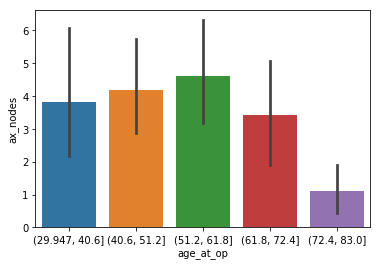

In [55]:
age_bins = pd.cut(df['age_at_op'], 5)
sns.barplot(x=age_bins, y=df['ax_nodes'])

Lower age was positively correlated with survival.
Survival was negatively correlated with number of positive axillary nodes.
Age and positive nodes were negatively correlated. My explanation is that positive nodes mean a more severe disease so is directly connected to lower survival. Lower age confers a general survival benefit as it does in most health contexts. Looking at the graph above, number of nodes peaks at around age 55 and then drops. This is probably not because older people don't get as many nodes, but rather because older people with advanced cancer are less likely to have surgery as it is more dangerous and less likely to work. There are also few very old people in the dataset, possibly skewing the statistics.